In [38]:
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap, cm

import cartopy

In [39]:
%matplotlib inline

In [40]:
path = "/home/wanderson/Documentos/ncl/"

In [41]:
DS_NCEP = xr.open_dataset(path +'MAY2015_24Z_12Z_NCEP.nc')

In [42]:
da = DS_NCEP.prec.mean('time')

In [43]:
#var  = DS_NCEP.variables['prec'][0,:,:]
lons = DS_NCEP.variables['lon'][:]
lats = DS_NCEP.variables['lat'][:]

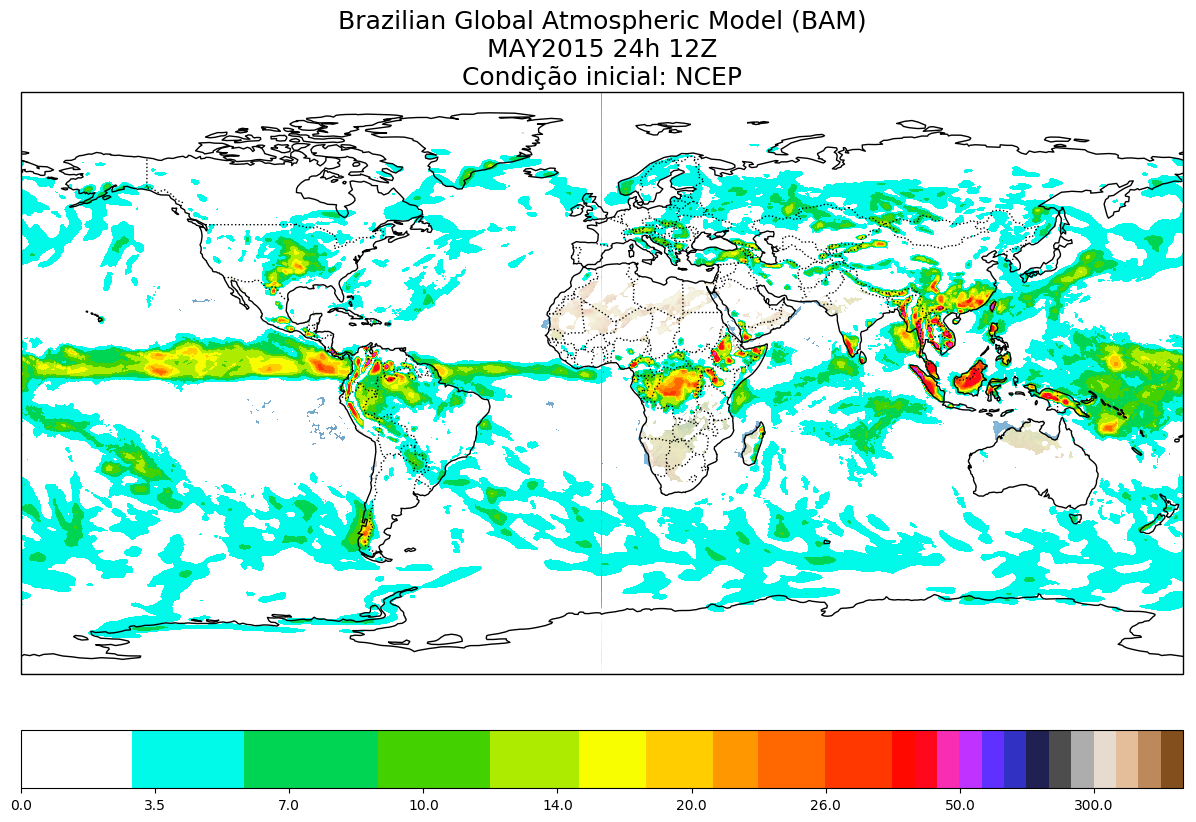

In [46]:
fig, ax = plt.subplots(111,figsize=(15,15), dpi=100)

ax = plt.axes(projection=ccrs.PlateCarree())
#cp = plt.contourf(lons,lats,da, 70, transform=ccrs.PlateCarree(),cmap=plt.cm.gist_ncar,zorder=1)
#clevs=[0,1,2,5,7,9,10,12,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
clevs=[0,1,1.5,2,2.5,3,3.5,4,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,
       11,11.5,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,
       29,30,40,50,70,100,150,200,250,300,400,500,600,750]
#clevs=[0,1,2,4,6,8,10,12,14,16,18,20,30,40,50]
cp = plt.contourf(lons,lats,da, clevs, cmap=cm.s3pcpn,zorder=1)


ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#for BR
#ax.set_extent([-85, -30, -60, 15])
ax.stock_img()
ax.set_title(
                       'Brazilian Global Atmospheric Model (BAM)' 
                     + '\n' 
                     + 'MAY2015 24h 12Z'
                     + '\n'
                     + 'Condição inicial: NCEP',
                     fontsize=18
)

fig.colorbar(cp, orientation='horizontal',pad=0.05)
fig.set_label('mm')

plt.show()

In [48]:
GPM = xr.open_dataset(path +'GPM_REC_ACUM_24h_grib2.nc')

In [76]:
te = GPM.PREC_surface.mean('time')


In [50]:
#var  = DS_NCEP.variables['prec'][0,:,:]
lons = GPM.variables['longitude'][:]
lats = GPM.variables['latitude'][:]

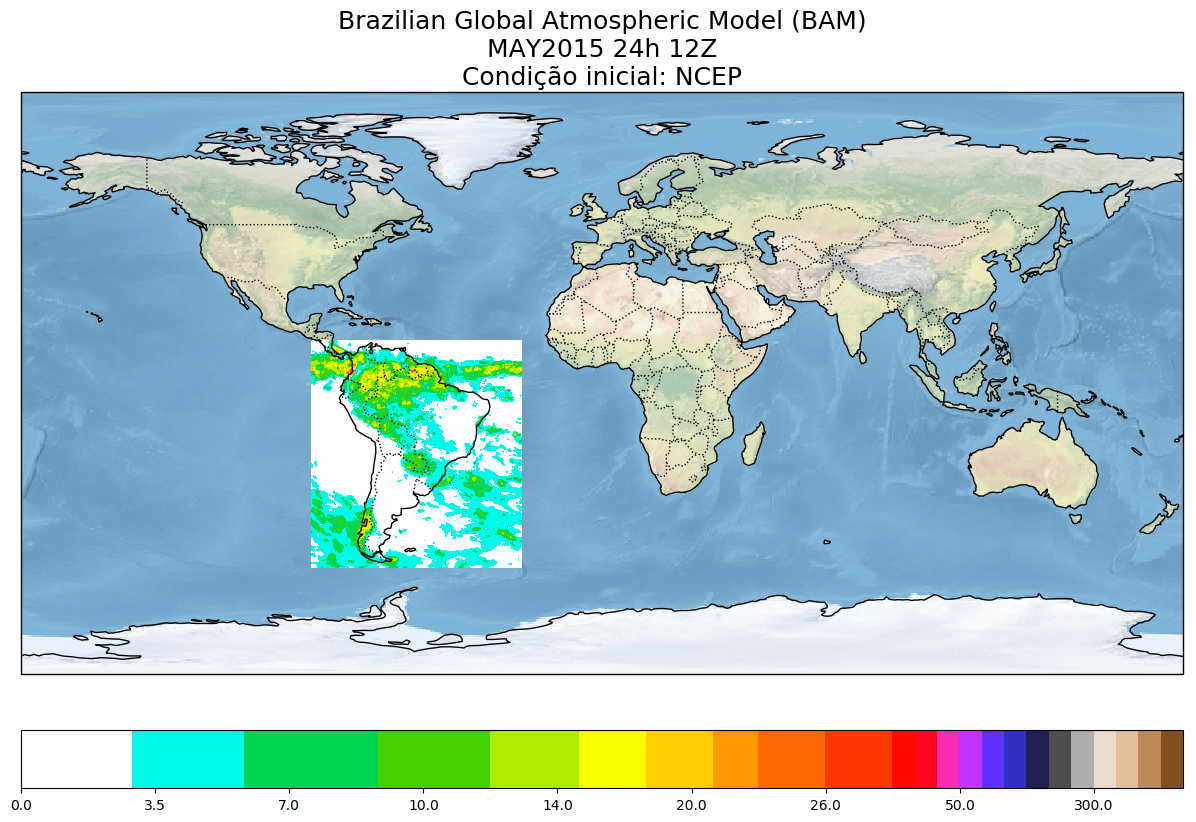

In [51]:
fig, ax = plt.subplots(111,figsize=(15,15), dpi=100)

ax = plt.axes(projection=ccrs.PlateCarree())
clevs=[0,1,1.5,2,2.5,3,3.5,4,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,
       11,11.5,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,
       29,30,40,50,70,100,150,200,250,300,400,500,600,750]
cp = plt.contourf(lons,lats,te, clevs, cmap=cm.s3pcpn,zorder=1)


ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#for BR
#ax.set_extent([-85, -30, -60, 15])
ax.stock_img()
ax.set_title(
                       'Brazilian Global Atmospheric Model (BAM)' 
                     + '\n' 
                     + 'MAY2015 24h 12Z'
                     + '\n'
                     + 'Condição inicial: NCEP',
                     fontsize=18
)

fig.colorbar(cp, orientation='horizontal',pad=0.05)
fig.set_label('mm')

plt.show()

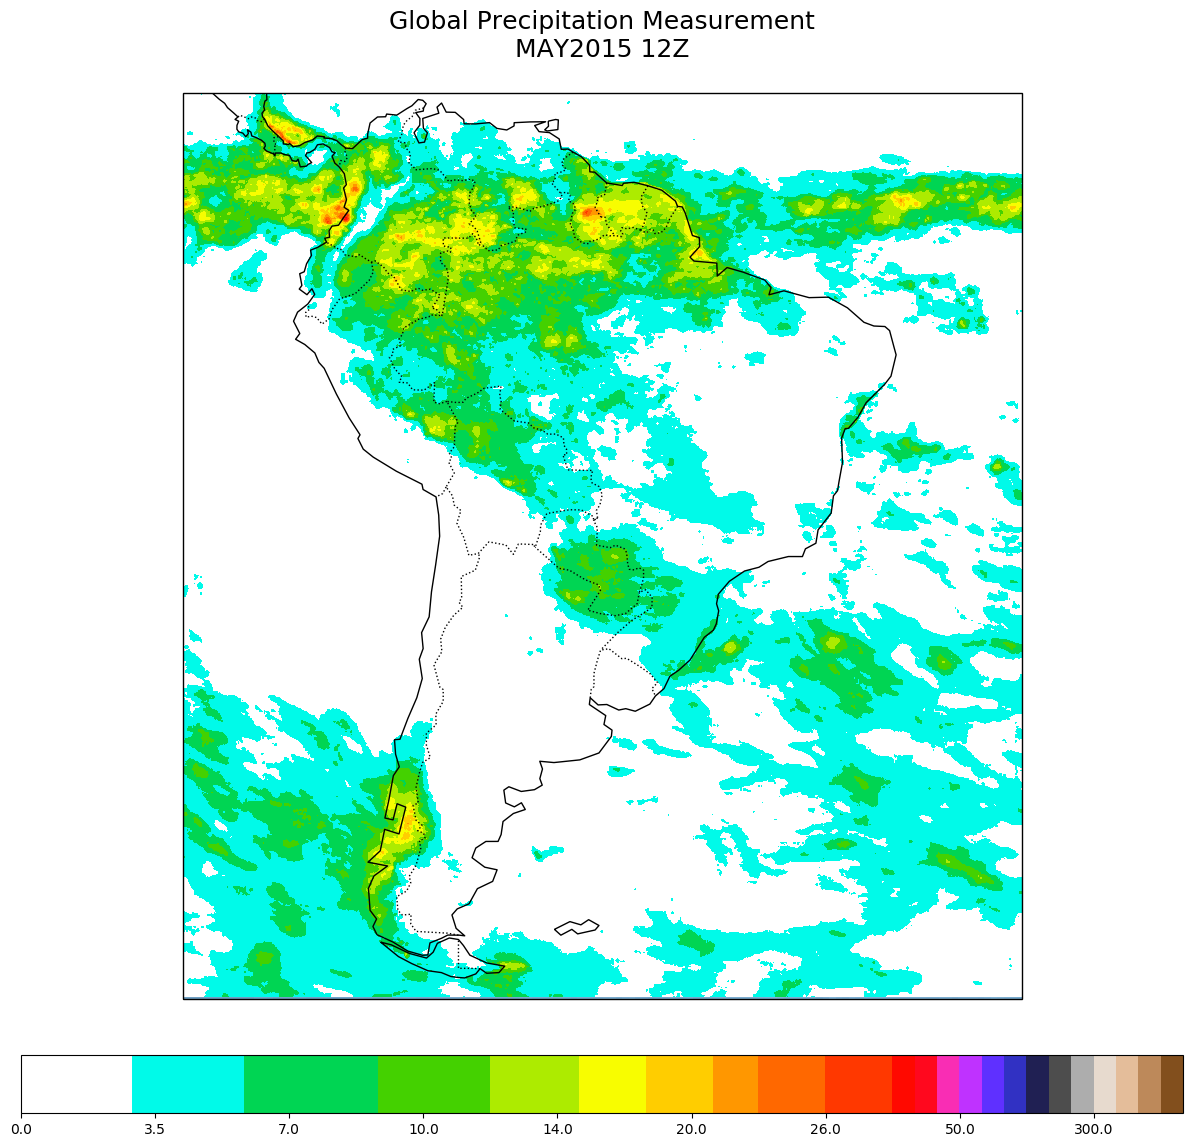

In [79]:
fig, ax = plt.subplots(111,figsize=(15,15), dpi=100)

ax = plt.axes(projection=ccrs.PlateCarree())
clevs=[0,1,1.5,2,2.5,3,3.5,4,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,
       11,11.5,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,
       29,30,40,50,70,100,150,200,250,300,400,500,600,750]
cp = plt.contourf(lons,lats,te, clevs, cmap=cm.s3pcpn,zorder=1)


ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
#for BR
ax.set_extent([-90, -25, -53, 11])
ax.stock_img()
ax.set_title(
                       'Global Precipitation Measurement' 
                     + '\n' 
                     + 'MAY2015 12Z'
                     + '\n',
                     fontsize=18
)

fig.colorbar(cp, orientation='horizontal',pad=0.05)
fig.set_label('mm')

plt.show()

In [12]:
#lonss = GPM.variables['longitude'][:]
#latss = GPM.variables['latitude'][:]
#pylab.rcParams['figure.figsize'] = (20,5)
#ax = plt.axes(projection=ccrs.PlateCarree())
#plt.contourf(lonss,latss,te, 70, transform=ccrs.PlateCarree())
#ax.coastlines()
#ax.stock_img()
#da.plot()
#plt.show()

In [13]:
#DS_SMG_V200 = xr.open_dataset(path +'MAY2015_24Z_12Z_SMG.nc')
#tt = DS_SMG_V200.prec.mean('time')
#lons = DS_NCEP.variables['lon'][:]
#lats = DS_NCEP.variables['lat'][:]

In [14]:
#pylab.rcParams['figure.figsize'] = (20,5)
#ax = plt.axes(projection=ccrs.Robinson())
#plt.contourf(lons,lats,tt, 70, transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)
#ax.coastlines()
#ax.stock_img()
#da.plot()
#plt.show()

In [15]:
#from cartopy.io import shapereader
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#def make_map(projection=ccrs.PlateCarree()):
#    fig, ax = plt.subplots(figsize=(9,13), subplot_kw=dict(projection=projection))
#    gl = ax.gridlines(draw_labels=True)
#    gl.xlabels_top = gl.ylabels_rigt = False
#    gl.xformatter = LONGITUDE_FORMATTER
#    gl.yformatter = LATITUDE_FORMATTER
#    return fig,ax

In [17]:
#import cartopy.io.img_tiles as cimgt

#extent = [-39, -38.25, -13.25, -12.5]
#request = cimgt.GoogleTiles()

In [27]:
#fig, ax = make_map(projection=request.crs)
#ax.set_extent(extent)
#ax.add_image(request, 10)
#ax.plot()
